![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Problemas Clásssicos da Computação

## Redes Neurais Artificiais

- Professor: Felipe Reis


---
### Importação de bibliotecas 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

#tensorflow
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras

In [2]:
## somente para compatibilidade com GTX1660 (e algumas GPUs da série 16)
##
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

In [3]:
if tf.test.gpu_device_name():
    print('Default GPU Name: {}'.format(device_lib.list_local_devices()))
else:
    print("Please install GPU version of TF")
    print('Acesse o menu Edit > Notebook Settings')
    print('Escolha a opção "Hardware Accelerator: GPU"')
    print('Importe novamente as bibliotecas e execute o código novamente')

Default GPU Name: [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16414651590035943373
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1109827524376004192
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5673960096
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12521861281907486207
physical_device_desc: "device: 0, name: GeForce GTX 1660, pci bus id: 0000:07:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9406329410750486374
physical_device_desc: "device: XLA_GPU device"
]


In [4]:
#funções úteis 
#Criado por: https://www.tensorflow.org/tutorials/keras/classification
#plota imagens
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

#plota valor do array
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

---
## Tensorflow e Keras

### Tensorflow

Tensorflow é uma plataforma de código aberto para aprendizado de máquinas. Para mais informações, acesse o site [https://www.tensorflow.org/](https://www.tensorflow.org/)

### Keras

Keras é uma API criada para facilitar o uso das APIs de aprendizado de máquina, como o Tensorflow. Para mais informações acesse o site [https://keras.io/](https://keras.io/).

### Informações sobre o tutorial a seguir

O código a seguir foi feito com base no tutorial "Treine sua primeira rede neural: classificação básica", disponibilizado na documentação do Tensorflow.

* Material de referência: https://www.tensorflow.org/tutorials/keras/classification

In [5]:
#Impressão de versão do Tensorflow
print('Versão Tensorflow:', tf.__version__)
print('Versão Keras:', keras.__version__)

Versão Tensorflow: 2.2.0
Versão Keras: 2.3.0-tf


### Base de Dados MNIST

O banco de dados MNIST contém dígitos manuscritos (escritos a mão).

Tem um conjunto de treinamento com 60.000 imagens e um conjunto de teste com 10.000 imagens. 

Os dígitos foram normalizados por tamanho e centralizados em uma imagem de tamanho fixo.

A base de dados foi criada por Yann LeCun em 1998.

A base MNIST está disponível em: [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)

![MNist](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Para nossos testes, no entanto, iremos usar uma base ligeiramente diferente, recomendada para treinamento inicial de bases de dados pelo tutorial do Tensorflow.

### Base de Dados Fashion MNist

O banco de dados Fashion MNIST contém imagens de roupas, nas seguintes categorias.

0. Camisetas/Top (T-shirt/top)
1. Calça (Trouser)
2. Suéter (Pullover)
3. Vestidos (Dress)
4. Casaco (Coat)
5. Sandálias (Sandal)
6. Camisas (Shirt)
7. Tênis (Sneaker)
8. Bolsa (Bag)
9. Botas (Ankle boot)

Contém  60.000 imagens de treinamento e 10.000 imagens de teste. 
Os dígitos foram normalizados por tamanho e centralizados em uma imagem de tamanho fixo.

A base de dados foi criada pela Zalando Research com objetivo de ser um substituto direto para o conjunto de dados MNIST original. Essa base pode ser usada para benchmarking de algoritmos de aprendizado de máquina.

A base de dados tem licensa MIT e está disponível em [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)

A base de dados também pode ser encontrada no Kaggle: [https://www.kaggle.com/zalando-research/fashionmnist](https://www.kaggle.com/zalando-research/fashionmnist)

![Fashion MNist](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

In [6]:
#download da base de dados
fashion_mnist = keras.datasets.fashion_mnist

#divisão em base de treinamento e testes (subdividido em imagens e labels)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
#definição das classes 
class_names = ['Camisetas', 'Calças', 'Suéter', 'Vestidos', 'Casacos',
               'Sandálias', 'Camisas', 'Tênis', 'Bolsas', 'Botas']

In [8]:
#informações sobre o tamanho o vetor das imagens (6k imagens, de 28x28)
train_images.shape

(60000, 28, 28)

In [9]:
#imprime os labels de treinamento (nome das classes)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
#informações sobre o tamanho o vetor das labels (6k labels)
print(train_labels.shape)

(60000,)


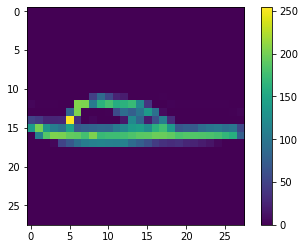

In [11]:
#podemos visualizar algumas imagens do conjunto de treinamento
plt.figure()
plt.imshow(train_images[30])
plt.colorbar()
plt.grid(False)
plt.show()

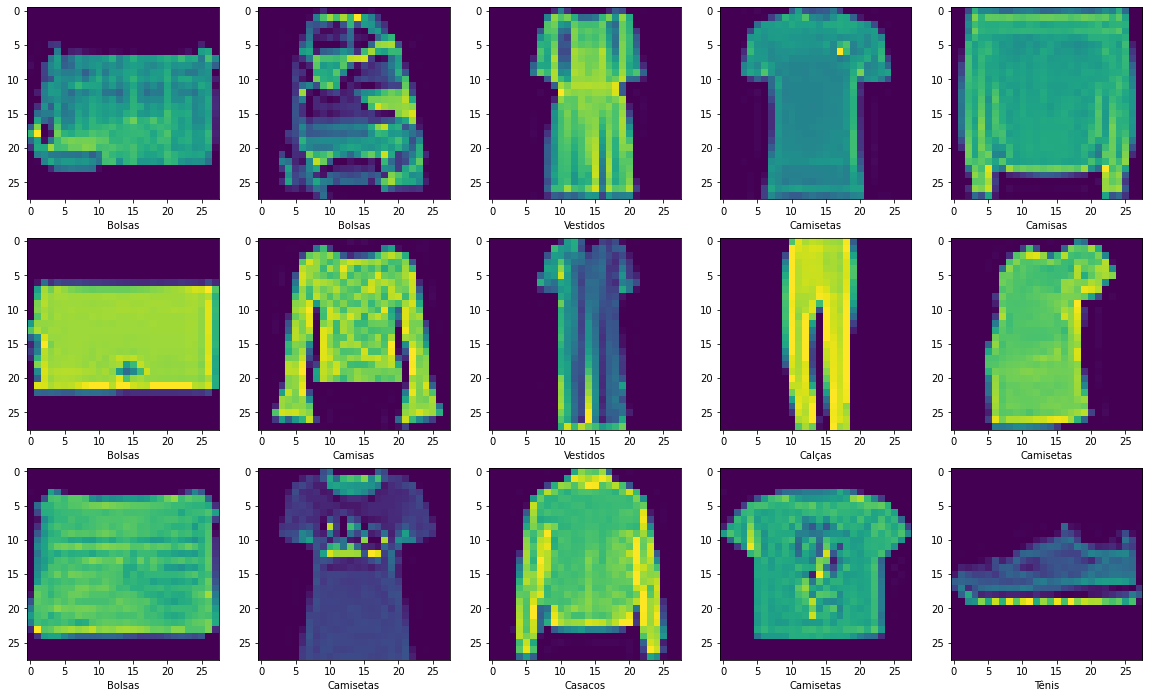

In [12]:
#imprimindo mais algumas imagens aleatórias
fig=plt.figure(figsize=(20, 12))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    idx = random.randrange(0, len(train_images))
    img = train_images[idx]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.xlabel(class_names[train_labels[idx]])
plt.show()

### Pré processamento

Para melhor aprendizar da rede, é necessário normalizar as imagens.

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

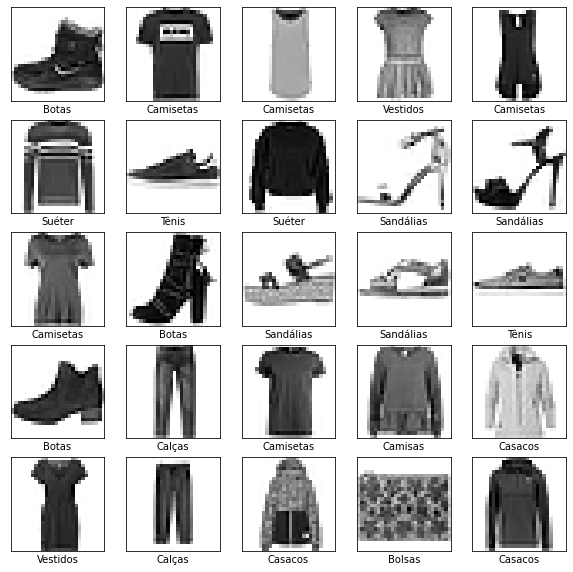

In [14]:
#algumas imagens, em escala cinza
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construção da rede neural

O principal bloco de construção da rede neural é a camada (*layer*). As camadas  extraem representações dos dados inseridos na rede. Na construção de redes, algumas camadas podem ser encadeadas

As camadas, como `tf.keras.layers.Dense`, tem paramêtros que são aprendidos durante o treinamento.

In [15]:
#modelo de rede sequencial
model = keras.Sequential([
    #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
    keras.layers.Flatten(input_shape=(28, 28)), 
    
    #Camada de dados totalmente conectadas, com ativação relu
    #A camada possui 128 nós (neurônios)
    keras.layers.Dense(128, activation='relu'),
    
    #Camada de dados totalmente conectadas, com ativação softmax
    #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
    keras.layers.Dense(10, activation='softmax')
])

### Compilação do modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de compilação:

* *Função Loss*: Essa mede quão preciso é o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para direção certa.

* *Optimizer*: Técnica para encontrar o ponto mínimo da função de perda, como o método do gradiente.

* *Métricas*: valores usados para  monitorar os passos de treinamento e teste. O exemplo, a acurácia (fração das imagens que foram classificadas corretamente) é utilizada para avaliação do modelo.

In [16]:
#compila o modelo
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Treinamento da rede

Treinar a rede neural requer os seguintes passos:

1. Informe as imagens de treino
2. Informe os *labels* (rótulos / classes) das imagens
3. Defina o número de épocas.

Para começar a treinar, chame o método `model.fit`, assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:o.

In [17]:
#realiza o treinamento da rede
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7413 - accuracy: 0.7590
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5150 - accuracy: 0.8233
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4710 - accuracy: 0.8373
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4463 - accuracy: 0.8443
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4291 - accuracy: 0.8507
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4150 - accuracy: 0.8554
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4035 - accuracy: 0.8592
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3941 - accuracy: 0.8631
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3854 - accuracy: 0.8659
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.377

### Avaliação do modelo

Após treinado, é possível avaliar a acurácia do conjunto de testes.

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Acurácia de testes: %.4f', test_acc)

313/313 - 0s - loss: 0.4195 - accuracy: 0.8518
Acurácia de testes: %.4f 0.8518000245094299


### Predições de imagens

Após treinado, é possível prever cada uma das imagens

In [19]:
#retorna predições de todo o conjunto de imagens de teste
predictions = model.predict(test_images)

#define a imagem a ser predita
num_imagem = 0
prediction = predictions[num_imagem]

#imprime a classe com maior probabilidade
class_pred = np.argmax(prediction)
print('Classe predita: ', class_names[class_pred])

Classe predita:  Botas


In [20]:
#imprime a probabilidade de cada classe para uma dada imagem
for cl, prob in zip(class_names, prediction):
    print(cl, prob)

Camisetas 9.084779e-06
Calças 5.2465057e-06
Suéter 1.3167859e-05
Vestidos 1.6230808e-05
Casacos 1.9922942e-05
Sandálias 0.115015104
Camisas 0.00013607851
Tênis 0.06961468
Bolsas 0.0079863565
Botas 0.8071841


In [21]:
#compara a predição com o rótulo correto
print('Classe prevista x classe correta')
print(class_names[class_pred], class_names[test_labels[num_imagem]])

Classe prevista x classe correta
Botas Botas


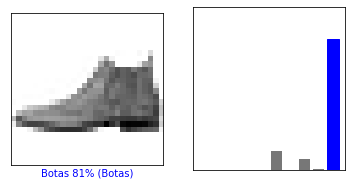

In [22]:
#plota imagem e gráfico de resultados
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(num_imagem, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(num_imagem, predictions,  test_labels)
plt.show()

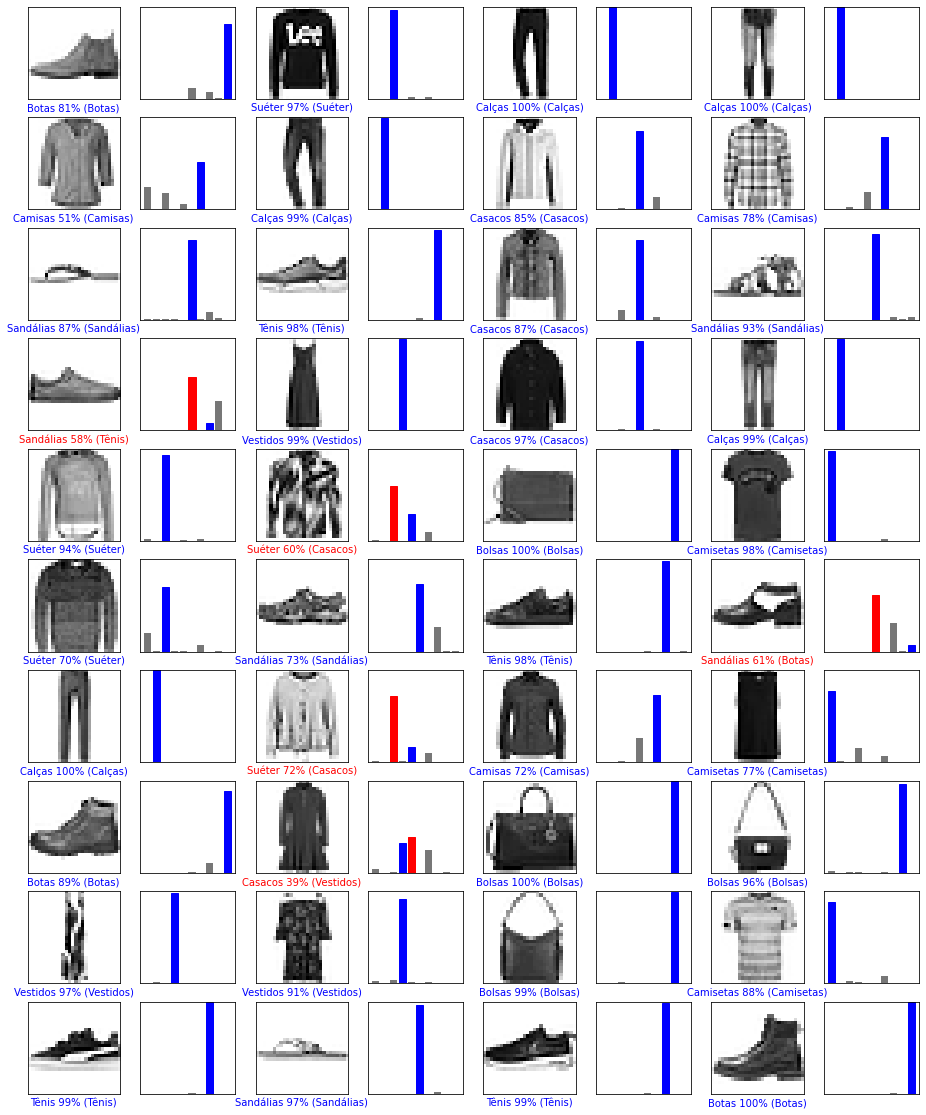

In [23]:
# Plota múltiplas imagens do conjunto de teste, labels preditas e labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 10
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

---
### Alteração de Otimizadores

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de compilação:

* *Função Loss*: Essa mede quão preciso é o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para direção certa.

* *Optimizer*: Técnica para encontrar o ponto mínimo da função de perda, como o método do gradiente.

* *Métricas*: valores usados para  monitorar os passos de treinamento e teste. O exemplo, a acurácia (fração das imagens que foram classificadas corretamente) é utilizada para avaliação do modelo.

In [24]:
#compilação do modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
#treinamento da rede
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4163 - accuracy: 0.8526
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3579 - accuracy: 0.8706
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3291 - accuracy: 0.8804
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3048 - accuracy: 0.8889
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2899 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2763 - accuracy: 0.8983
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2649 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2541 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2439 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.234

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Acurácia de testes: %.4f', test_acc)

313/313 - 0s - loss: 0.3356 - accuracy: 0.8855
Acurácia de testes: %.4f 0.8855000138282776


### Alteração de Parâmetros

Iremos alterar a taxa de aprendizado de otimizador Adam, para vermos a alteração de desempenho causada por esta modificação.

```
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

In [27]:
#compilação do modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
#treinamento da rede
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2307 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2216 - accuracy: 0.9168
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2144 - accuracy: 0.9207
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2105 - accuracy: 0.9208
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2030 - accuracy: 0.9239
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1979 - accuracy: 0.9245
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1913 - accuracy: 0.9274
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1872 - accuracy: 0.9300
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1826 - accuracy: 0.9319
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.175

In [29]:
#avaliação do modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Acurácia de testes: %.4f' % test_acc)

313/313 - 0s - loss: 0.3561 - accuracy: 0.8895
Acurácia de testes: 0.8895


---
### Rede Convolucional

1. **Otimizador: Adam**
2. **Número de épocas: 10**

```
model = keras.Sequential([
    #convolução com 32 nós
    keras.layers.Conv2D(32, 3, activation='relu'),
    
    #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
    keras.layers.Flatten(input_shape=(28, 28)), 
    
    #Camada de dados totalmente conectadas, com ativação relu
    #A camada possui 128 nós (neurônios)
    keras.layers.Dense(128, activation='relu'),
    
    #Camada de dados totalmente conectadas, com ativação softmax
    #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
    keras.layers.Dense(10, activation='softmax')
])
```

In [15]:
#para a nova rede, é necessário alterar a dimensão do array de dados
#dimensão anterior: (60000,28,28)
#dimensão atual: (60000,28,28,1)
train_images = train_images[..., np.newaxis]
print(train_images.shape)

(60000, 28, 28, 1)


In [16]:
#para a nova rede, é necessário alterar a dimensão do array de dados
#dimensão anterior: (10000,28,28)
#dimensão atual: (10000,28,28,1)
test_images = test_images[..., np.newaxis]
print(test_images.shape)

(10000, 28, 28, 1)


In [17]:
#modelo da rede
model = keras.Sequential([
    #convolução com 32 nós
    keras.layers.Conv2D(32, 3, activation='relu'),
    
    #pooling de 2x2
    keras.layers.MaxPooling2D((2, 2)),
    
    #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
    keras.layers.Flatten(), 
    
    #Camada de dados totalmente conectadas, com ativação relu
    #A camada possui 128 nós (neurônios)
    keras.layers.Dense(128, activation='relu'),
    
    #Camada de dados totalmente conectadas, com ativação softmax
    #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
#compilação do modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
#treinamento da rede
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4017 - accuracy: 0.8576
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2716 - accuracy: 0.9011
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2289 - accuracy: 0.9169
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1941 - accuracy: 0.9281
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1670 - accuracy: 0.9384
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1419 - accuracy: 0.9480
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1210 - accuracy: 0.9551
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1033 - accuracy: 0.9624
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0873 - accuracy: 0.9679
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.075

In [20]:
#avaliação do modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Acurácia de testes: %.4f' % test_acc)

313/313 - 1s - loss: 0.2971 - accuracy: 0.9186
Acurácia de testes: 0.9186


### Melhoria Arquitetura Rede Convolucional

In [38]:
#modelo da rede
model = keras.Sequential([
    #convolução com 32 nós
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    #convolução com 32 nós
    #keras.layers.Conv2D(32, 3, activation='relu'),
    #keras.layers.Conv2D(32, 3, activation='relu'),
    #keras.layers.MaxPooling2D((2, 2)),
    
    #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
    keras.layers.Flatten(), 
    
    #Camada de dados totalmente conectadas, com ativação relu
    #A camada possui 128 nós (neurônios)
    keras.layers.Dense(128, activation='relu'),
    
    #Camada de dados totalmente conectadas, com ativação softmax
    #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
    keras.layers.Dense(10, activation='softmax')
])

In [39]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
#treinamento da rede
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3804 - accuracy: 0.8623
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2443 - accuracy: 0.9097
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1921 - accuracy: 0.9289
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1516 - accuracy: 0.9447
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1180 - accuracy: 0.9558
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0907 - accuracy: 0.9668
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0687 - accuracy: 0.9743
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0542 - accuracy: 0.9800
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0433 - accuracy: 0.9842
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [ ]:
#avaliação do modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Acurácia de testes: %.4f' % test_acc)

### Variações Arquiteturais

Utilize esta seção para promover variações arquiteturais e observar o desempenho da rede.

In [76]:
#modelo da rede
model = keras.Sequential([
    #convolução com 32 nós
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    #convolução com 32 nós
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
    keras.layers.Flatten(), 
    
    #Camada de dados totalmente conectadas, com ativação relu
    #A camada possui 128 nós (neurônios)
    keras.layers.Dense(128, activation='relu'),
    
    #Camada de dados totalmente conectadas, com ativação softmax
    #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
    keras.layers.Dense(10, activation='softmax')
])

In [77]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [78]:
#treinamento da rede
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4727 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3173 - accuracy: 0.8839
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2748 - accuracy: 0.8992
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2456 - accuracy: 0.9086
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2218 - accuracy: 0.9179
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2033 - accuracy: 0.9247
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1831 - accuracy: 0.9318
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1692 - accuracy: 0.9370
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1531 - accuracy: 0.9429
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.140

In [ ]:
#avaliação do modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Acurácia de testes: %.4f' % test_acc